In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
df_x = pd.read_csv('../data/dataset_01/data.csv')
df_y = pd.read_csv('../data/dataset_01/answer.csv')

In [6]:
# df_x = df_x.drop(labels=['Unnamed: 0'], axis=1)
df_x

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,12.0,9.0,4.0,3.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,20.0,14.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,21.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,0.0,6.0,0.0,12.0,0.0,0.0,0.0
2496,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,13.0,10.0,15.0,0.0,0.0,0.0
2497,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,0.0,4.0,0.0,4.0,5.0,0.0,0.0,11.0,7.0
2498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,12.0,19.0,2.0,0.0,0.0,1.0,0.0


In [7]:
# df_y = df_y.drop(labels=['Unnamed: 0'], axis=1)
df_y

,x1,y1,z1,x2,y2,z2
0,1.62606,-0.801,4.74964,7.60840,26.812,2.75866
1,6.54501,-0.801,4.20302,2.13407,26.812,3.88737
2,3.46594,26.812,2.80550,5.76182,-0.801,2.63862
3,5.28630,-0.801,5.03381,7.38835,26.812,3.39033
4,2.71396,26.812,4.48287,2.39695,-0.801,2.70770
...,...,...,...,...,...,...
2495,7.75790,-0.801,4.62405,6.93627,26.812,2.88103
2496,5.54549,-0.801,4.11952,2.97840,26.812,3.58746
2497,5.59828,26.812,3.78629,2.16425,-0.801,3.33187
2498,6.80879,-0.801,5.00507,2.30580,26.812,2.72997


In [8]:
df = pd.concat([df_x, df_y], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,668,669,670,671,x1,y1,z1,x2,y2,z2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0.0,0.0,1.62606,-0.801,4.74964,7.60840,26.812,2.75866
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.54501,-0.801,4.20302,2.13407,26.812,3.88737
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,1.0,0.0,3.46594,26.812,2.80550,5.76182,-0.801,2.63862
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,5.28630,-0.801,5.03381,7.38835,26.812,3.39033
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,2.71396,26.812,4.48287,2.39695,-0.801,2.70770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,7.75790,-0.801,4.62405,6.93627,26.812,2.88103
2496,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,5.54549,-0.801,4.11952,2.97840,26.812,3.58746
2497,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,7.0,5.59828,26.812,3.78629,2.16425,-0.801,3.33187
2498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,6.80879,-0.801,5.00507,2.30580,26.812,2.72997


In [9]:
labels = [str(i) for i in range(672)]

In [10]:
df = df.drop_duplicates(subset=labels, ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,668,669,670,671,x1,y1,z1,x2,y2,z2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0.0,0.0,1.62606,-0.801,4.74964,7.60840,26.812,2.75866
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.54501,-0.801,4.20302,2.13407,26.812,3.88737
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,1.0,0.0,3.46594,26.812,2.80550,5.76182,-0.801,2.63862
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,5.28630,-0.801,5.03381,7.38835,26.812,3.39033
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,2.71396,26.812,4.48287,2.39695,-0.801,2.70770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,7.75790,-0.801,4.62405,6.93627,26.812,2.88103
1996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,5.54549,-0.801,4.11952,2.97840,26.812,3.58746
1997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,7.0,5.59828,26.812,3.78629,2.16425,-0.801,3.33187
1998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,6.80879,-0.801,5.00507,2.30580,26.812,2.72997


In [11]:
df_x = df.drop(labels=['x1', 'y1', 'z1', 'x2', 'y2', 'z2'], axis=1)
df_x

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,12.0,9.0,4.0,3.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,20.0,14.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,21.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,0.0,6.0,0.0,12.0,0.0,0.0,0.0
1996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,13.0,10.0,15.0,0.0,0.0,0.0
1997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,0.0,4.0,0.0,4.0,5.0,0.0,0.0,11.0,7.0
1998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,12.0,19.0,2.0,0.0,0.0,1.0,0.0


In [12]:
df_y = df.drop(labels=labels, axis=1)
df_y

,x1,y1,z1,x2,y2,z2
0,1.62606,-0.801,4.74964,7.60840,26.812,2.75866
1,6.54501,-0.801,4.20302,2.13407,26.812,3.88737
2,3.46594,26.812,2.80550,5.76182,-0.801,2.63862
3,5.28630,-0.801,5.03381,7.38835,26.812,3.39033
4,2.71396,26.812,4.48287,2.39695,-0.801,2.70770
...,...,...,...,...,...,...
1995,7.75790,-0.801,4.62405,6.93627,26.812,2.88103
1996,5.54549,-0.801,4.11952,2.97840,26.812,3.58746
1997,5.59828,26.812,3.78629,2.16425,-0.801,3.33187
1998,6.80879,-0.801,5.00507,2.30580,26.812,2.72997


In [13]:
df_x = np.reshape(df_x.to_numpy(), (-1, 1, 24, 28))
df_x.shape

(2000, 1, 24, 28)

In [14]:
df_y = df_y.to_numpy()
df_y

array([[ 1.62606, -0.801  ,  4.74964,  7.6084 , 26.812  ,  2.75866],
       [ 6.54501, -0.801  ,  4.20302,  2.13407, 26.812  ,  3.88737],
       [ 3.46594, 26.812  ,  2.8055 ,  5.76182, -0.801  ,  2.63862],
       ...,
       [ 5.59828, 26.812  ,  3.78629,  2.16425, -0.801  ,  3.33187],
       [ 6.80879, -0.801  ,  5.00507,  2.3058 , 26.812  ,  2.72997],
       [ 5.8794 , -0.801  ,  4.52526,  3.092  , 26.812  ,  2.80852]])

In [17]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.9)

train_x, valid_x, train_y, valid_y = train_test_split(train_x,
                                                    train_y,
                                                    test_size=0.33)

In [18]:
print(train_x.shape), print(train_y.shape)
print(valid_x.shape), print(valid_y.shape)
print(test_x.shape), print(test_y.shape)

(1206, 1, 24, 28)
(1206, 6)
(594, 1, 24, 28)
(594, 6)
(200, 1, 24, 28)
(200, 6)


(None, None)

In [19]:
train_x = torch.tensor(train_x).float()
train_y = torch.tensor(train_y).float()
valid_x = torch.tensor(valid_x).float()
valid_y = torch.tensor(valid_y).float()
test_x = torch.tensor(test_x).float()
test_y = torch.tensor(test_y).float()

In [20]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

In [21]:
class ResNet(nn.Module):
    def __init__(self, block, layers, num_params):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(6, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self.make_layer(block, 64, layers[0], stride=1)
        self.layer2 = self.make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self.make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self.make_layer(block, 512, layers[3], stride=2)
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512 * block.expansion, num_params)

    def make_layer(self, block, out_channels, blocks, stride):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels, 1))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [22]:
# Instantiate the model
model = ResNet(BasicBlock, [1, 1, 1, 1], num_params=6)

In [23]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [24]:
# init weights
def init_weights(model) -> None:
    if isinstance(model, nn.Linear):
        torch.nn.init.xavier_uniform_(model.weight)
        model.bias.data.fill_(0.1)

model.apply(init_weights)

# if torch.cuda.is_available():
#     model = model.cuda()

#     train_x = train_x.cuda()
#     train_y = train_y.cuda()
#     valid_x = valid_x.cuda()
#     valid_y = valid_y.cuda()
#     test_x = test_x.cuda()
#     test_y = test_y.cuda()

ResNet(
  (conv1): Conv2d(6, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
  )
  (layer2): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128,

In [26]:
lr = 1e-3
batch_size = 64
max_epoch = 30
losses_train = []
losses_valid = []

for epoch in range(max_epoch):
    train_loss = 0.0
    for i in range(0, train_x.size()[0], batch_size):
        data = train_x[i:i + batch_size]
        target = train_y[i:i + batch_size]

        optimizer.zero_grad()
        prediction = model(data)
        loss = loss_function(prediction, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    valid_loss = 0.0
    for i in range(0, valid_x.size()[0], batch_size):
        data = valid_x[i:i + batch_size]
        target = valid_y[i:i + batch_size]

        prediction = model(data)
        loss = loss_function(prediction, target)
        valid_loss += loss.item()

    # if (epoch) % 10 == 0:
    print(
        f'Epoch {epoch} \t\t Training Loss: {train_loss / len(train_x)} \t\t Validation Loss: {valid_loss / len(valid_x)}'
    )
    
    if epoch > 0 and valid_loss / len(valid_x)  < min(losses_valid):
        torch.save(model.state_dict(), 
           "../logs/weights_model_03/model_state_adam_01.pt")
        print("Save model")
        
    
    losses_train.append(train_loss / len(train_x))
    losses_valid.append(valid_loss / len(valid_x))

RuntimeError: Given groups=1, weight of size [64, 6, 3, 3], expected input[32, 1, 24, 28] to have 6 channels, but got 1 channels instead

In [113]:
# torch.save(model.state_dict(), 
        #    "../logs/weights_model_03/model_state_rmsprop.pt")

In [114]:
losses = pd.DataFrame([losses_train, losses_valid],
                      index=["Train loss", "Valid loss"]).T
losses

,Train loss,Valid loss
0,2.099565,3.087852
1,1.762841,1.823841
2,1.584397,1.844512
3,1.253782,1.315357
4,1.047684,1.259303
5,0.954952,1.058638
6,0.869825,1.098710
7,0.798443,1.380142
8,0.763100,0.919316
9,0.717714,0.991498


Text(0, 0.5, 'Значение функции потерь')

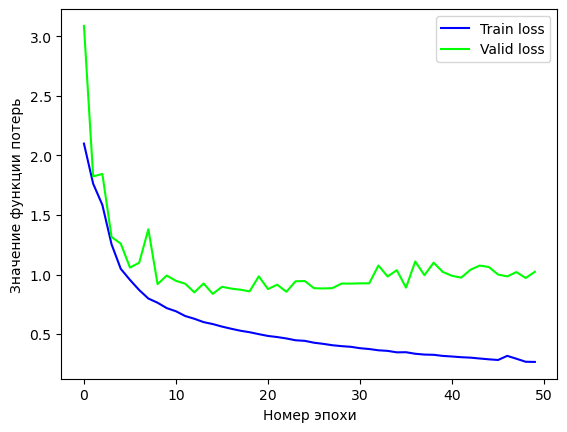

In [115]:
ax = losses.plot(colormap="brg")
ax.set_xlabel("Номер эпохи")
ax.set_ylabel("Значение функции потерь")

In [50]:
# Move the model to the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Summary of the model
input_size = (6, 24, 28)
summary(model, input_size=input_size, device=str(device))

# Save the summary as an image
summary_image_path = "resnet_summary.png"
summary(model, input_size=input_size, device=str(device), show_input=True, show_hierarchical=True, path=summary_image_path)

print(f"Model summary saved to {summary_image_path}")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 24, 28]           3,456
       BatchNorm2d-2           [-1, 64, 24, 28]             128
            Conv2d-3           [-1, 64, 24, 28]          36,864
       BatchNorm2d-4           [-1, 64, 24, 28]             128
            Conv2d-5           [-1, 64, 24, 28]          36,864
       BatchNorm2d-6           [-1, 64, 24, 28]             128
        BasicBlock-7           [-1, 64, 24, 28]               0
            Conv2d-8          [-1, 128, 12, 14]          73,728
       BatchNorm2d-9          [-1, 128, 12, 14]             256
           Conv2d-10          [-1, 128, 12, 14]         147,456
      BatchNorm2d-11          [-1, 128, 12, 14]             256
           Conv2d-12          [-1, 128, 12, 14]           8,192
      BatchNorm2d-13          [-1, 128, 12, 14]             256
       BasicBlock-14          [-1, 128,

TypeError: summary() got an unexpected keyword argument 'show_input'

In [26]:
# Generate example data
num_samples = 100
input_size = (24, 28)
num_params = 6

# Generate random input data (batch_size, channels, height, width)
input_data = torch.randn((num_samples, 6, *input_size))

# Generate random target values (batch_size, num_params)
target_data = torch.randn((num_samples, num_params))

print("Input shape:", input_data.shape)
print("Target shape:", target_data.shape)

Input shape: torch.Size([100, 6, 24, 28])
Target shape: torch.Size([100, 6])


In [27]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [28]:
# Sample input (replace with your actual data)
sample_input = torch.randn((1, 3, 224, 224))

In [29]:
# Forward pass
output = model(input_data)

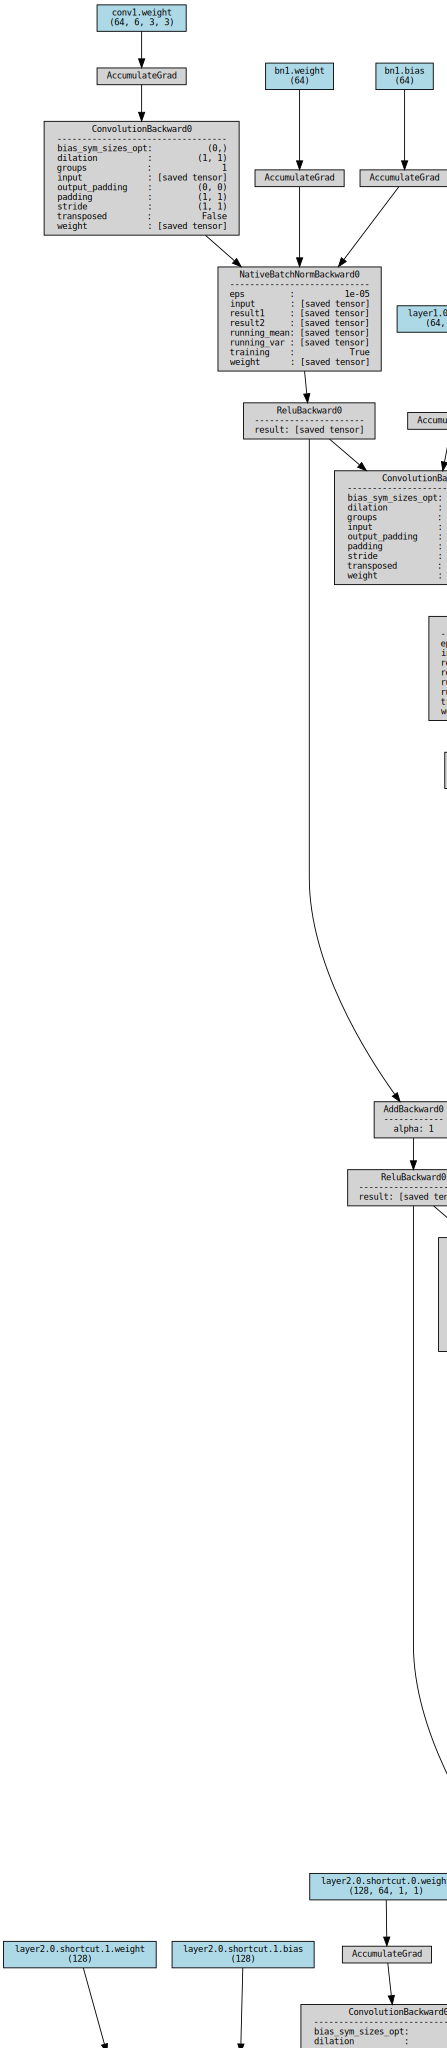

In [34]:
make_dot(output.mean(), params=dict(model.named_parameters()), show_attrs=True)

In [24]:
# Print the model architecture
print(model)

ResNet(
  (conv1): Conv2d(6, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [25]:
# Print the output shape
print("Output shape:", output.shape)

NameError: name 'output' is not defined